#Google Colaboratory で自然言語処理

# 環境構築
環境はUbuntu

 ## MeCabの導入
 形態素解析器

In [0]:
!apt install mecab libmecab-dev mecab-ipadic-utf8
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 7 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubu

## mecab-ipadic-NEologdの導入
MeCabの追加辞書
[mecab-ipadic-NEologd](https://github.com/neologd/mecab-ipadic-neologd/blob/master/README.ja.md)<br>colabの環境が更新されて動かなかったら上のリンク見て

In [0]:
!apt install file
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!cd mecab-ipadic-neologd && ./bin/install-mecab-ipadic-neologd -n -a -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.4).
The following additional packages will be installed:
  libmagic-mgc libmagic1
The following NEW packages will be installed:
  file libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 275 kB of archives.
After this operation, 5,294 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.2 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.2 [68.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.2 [22.1 kB]
Fetched 275 kB in 0s (1,987 kB/s)
Selecting previously unselected package libmagic-mgc.
(Reading database ... 131361 files and directories currently installed.)
Preparing to unpack .../libmagic-mgc_1%3a5.

## Word2vec学習済みモデルのダウンロード
[日本語 Wikipedia エンティティベクトル](http://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/)

In [0]:
!curl -L -O https://github.com/singletongue/WikiEntVec/releases/download/20190520/jawiki.all_vectors.100d.txt.bz2 && bunzip2 jawiki.all_vectors.100d.txt.bz2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   622    0   622    0     0   3094      0 --:--:-- --:--:-- --:--:--  3094
100  598M  100  598M    0     0  24.1M      0  0:00:24  0:00:24 --:--:-- 12.3M


## matplotlibで日本語
import japanize-matplotlibするだけで日本語表示ができるようになる

In [0]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 8.2MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=03ee4bc2f107baf2962b93bc7934724f8843755ef6e37d08e63817a76813733f
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


#環境構築終わり
以下python

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import japanize_matplotlib
import gensim

In [0]:
#Word2vecのモデルの読み込み
model = gensim.models.KeyedVectors.load_word2vec_format("/content/jawiki.all_vectors.100d.txt")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#単語からベクトルの取り出し
print(model["日本"])

[ 5.30889511e-01 -2.57213235e-01 -1.59220584e-02 -4.43872392e-01
  2.71221787e-01 -1.47873849e-01 -1.60650671e-01  3.76813039e-02
  2.01499194e-01 -2.68208683e-02  2.56034791e-01 -3.11926872e-01
  9.89468396e-02  6.42983854e-01 -1.48453295e-01  2.68574059e-01
 -3.14776182e-01  1.63276732e-01 -4.87488359e-02 -2.80927867e-01
  1.43521684e-04  7.68588781e-02 -5.53616993e-02 -2.08212003e-01
  2.86783755e-01  3.41469854e-01 -1.54067263e-01 -2.12375090e-01
 -5.23720384e-01  1.69052696e-03  2.17034683e-01 -4.36213195e-01
  5.40924780e-02 -6.58204496e-01 -9.03449208e-02 -4.66142148e-01
 -2.65461095e-02  1.01459041e-01 -1.25326768e-01 -3.69417846e-01
 -3.86606038e-01  2.01364979e-01 -2.10095160e-02  1.05791129e-01
  8.69495720e-02 -1.50322765e-01  3.10459822e-01 -2.49653801e-01
  2.40822718e-01 -8.23203623e-02 -1.70377642e-01  2.89304972e-01
 -1.04047254e-01 -5.41331209e-02 -2.01893136e-01 -3.96439135e-02
  3.69843423e-01 -1.44937128e-01 -4.12835479e-01 -5.29332459e-02
 -1.45312948e-02  1.45022

In [0]:
words = ["キャッシュレス", "Suica", "クレジットカード", "自動車", "バドミントン", "数学", "神経", "電車"]
vectors = [model[word] for word in words]

In [0]:
#PCA
pca = PCA(2)
pca.fit(vectors)
vec_pca = pca.transform(vectors)

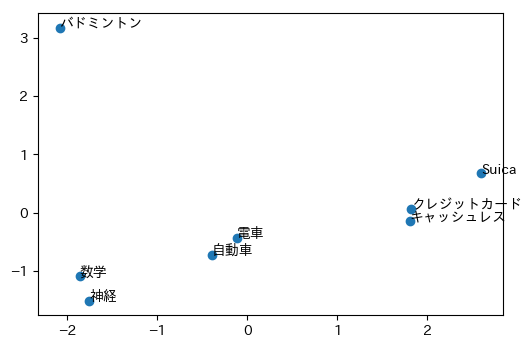

In [0]:
plt.figure(dpi=100)
plt.scatter(vec_pca[:,0],vec_pca[:,1])
for word,vec in zip(words,vec_pca):
  plt.annotate(word,(vec[0],vec[1]))
plt.show()

#おまけ：PythonからNEologd辞書を使用したMeCabの分かち書き

In [0]:
import MeCab

In [0]:
sentence = "あめんぼあかいなあいうえお"

#引数はシステム辞書にNEologd辞書を使用してねということ
m = MeCab.Tagger("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")

print("これはそのまま出力\n-----")
print(m.parse(sentence))

print("\n1行毎に分ける\n-----")
for word in m.parse(sentence).splitlines():
  if word != "EOS":
    print(word)
  
print("\n色々取り出す\n-----")
for word in m.parse(sentence).splitlines():
  if word != "EOS":
    print("単語: {}".format(word.split("\t")[0]))
    print("品詞: {}".format(word.split("\t")[1].split(",")[0]))

これはそのまま出力
-----
あめんぼ	名詞,一般,*,*,*,*,あめんぼ,アメンボ,アメンボ
あかい	形容詞,自立,*,*,形容詞・アウオ段,基本形,あかい,アカイ,アカイ
な	助詞,終助詞,*,*,*,*,な,ナ,ナ
あいうえお	名詞,固有名詞,人名,一般,*,*,あいうえお,アイウエオ,アイウエオ
EOS


1行毎に分ける
-----
あめんぼ	名詞,一般,*,*,*,*,あめんぼ,アメンボ,アメンボ
あかい	形容詞,自立,*,*,形容詞・アウオ段,基本形,あかい,アカイ,アカイ
な	助詞,終助詞,*,*,*,*,な,ナ,ナ
あいうえお	名詞,固有名詞,人名,一般,*,*,あいうえお,アイウエオ,アイウエオ

色々取り出す
-----
単語: あめんぼ
品詞: 名詞
単語: あかい
品詞: 形容詞
単語: な
品詞: 助詞
単語: あいうえお
品詞: 名詞
